# Linear Regression
Vamos a ejecutar la función de regresión lineal que nos proporciona la librería sklearn.linear_model

<b>Paso 0.</b> Importación de librerías

In [24]:
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

<b>Paso 1.</b> Importamos las funciones de Split y de Regresión Lineal de sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<b>Paso 2.</b> Cargamos el fichero

In [3]:
PATH_NAME = '../Data/'
FILE_NAME = 'weight-height.csv'
df = pd.read_csv(PATH_NAME+FILE_NAME)

<b>Paso 3.</b> Comprovamos los datos cargados

In [4]:
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


<b>Paso 4a</b>. Convertimos el string Gender a número para poder aplicar la regresión lineal

In [5]:
df['Gender'] = df.replace({'Gender': {'Male':0, 'Female':1}}) 

<b>Paso 4b.</b> Dividimos los datos en una parte de Train y otra parte de Test. Un 40% de datos que sean para Test

In [6]:
print(df)

      Gender     Height      Weight
0        0.0  73.847017  241.893563
1        0.0  68.781904  162.310473
2        0.0  74.110105  212.740856
3        0.0  71.730978  220.042470
4        0.0  69.881796  206.349801
...      ...        ...         ...
9995     1.0  66.172652  136.777454
9996     1.0  67.067155  170.867906
9997     1.0  63.867992  128.475319
9998     1.0  69.034243  163.852461
9999     1.0  61.944246  113.649103

[10000 rows x 3 columns]


<b>Paso 5.</b> Realizamos la Regresión Lineal sobre el dataset de Entrenamiento para encontrar un modelo

In [7]:
target = df['Weight']
df.pop('Weight')
df.head()

features = StandardScaler().fit_transform(df)
features

particion = 0.4
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=particion)
lr = LinearRegression()
modelo = lr.fit(X_train, y_train)

In [8]:
lr.score(X_train, y_train)

0.9016657947442838

<b>Paso 6.</b> Una vez entrenado, aplicamos sobre los datos de testeo

In [9]:
predicciones=lr.predict(X_test)
predicciones

array([144.67684899, 172.44017154, 148.85340733, ..., 123.82080028,
       127.28344663, 144.25565226])

In [10]:
lr.score(X_test, y_test)

0.9043323533061335

<b>Paso 7.</b> Diferencias entre datos reales (Y_test) y predicción (predictions)

In [11]:
r2_score(predicciones,y_test)

0.8938677314556193

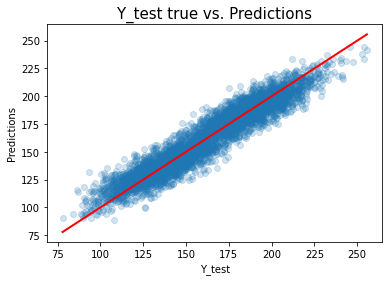

In [12]:
plt.scatter(y_test,predicciones,alpha=0.2)
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.title('Y_test true vs. Predictions', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

<b>Paso 8.</b> Listamos el Peso (w) y el Bias (b) de la función lineal resultante

In [13]:
w = lr.coef_
print(w)
b = lr.intercept_
print(b)

[-9.61903439 23.03584358]
161.5375556203414


<b>Paso 9.</b> Miramos el error (mse)

In [14]:
def mse(y1,y2):
    err = abs(y1-y2)**2
    return err.mean()

print(mse(predicciones,y_test))

98.66986519975252


In [15]:
msee(y_test,predicciones)

98.66986519975256

<b>Paso 10.</b> Miramos el error (mae)

In [16]:
mae(y_test,predicciones)

7.941199586675264

<b>Paso 11 -extra-</b> ¿Cambia el error si aumentamos los datos de entrenamiento y disminuimos el test al 20%? Razona tu respuesta

In [17]:
xe = []
m1 = []
m2 = []
sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for u in sizes:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=u)
    lr = LinearRegression()
    modelo = lr.fit(X_train, y_train)
    lr.score(X_train, y_train)
    predicciones=lr.predict(X_test)
    xe.append(u)
    m1.append(msee(y_test,predicciones))
    m2.append(mae(y_test,predicciones))


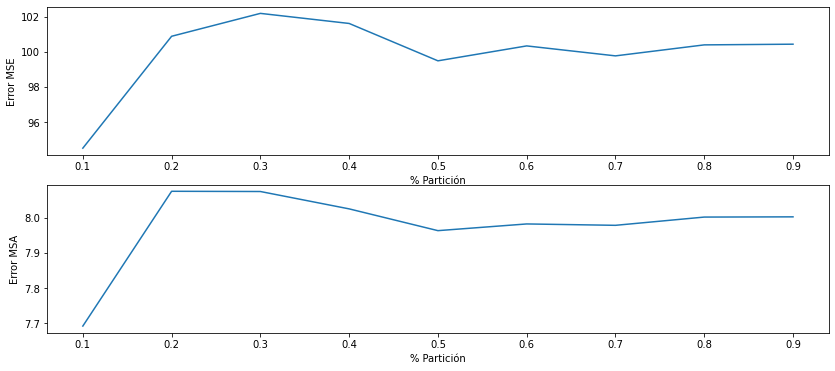

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(xe,m1)
plt.xlabel('% Partición')
plt.ylabel('Error MSE')
plt.subplot(2,1,2)
plt.plot(xe,m2)
plt.xlabel('% Partición')
plt.ylabel('Error MSA')
plt.show()

<b>Paso 12 -extra-</b> Prueba de quitar la columna Gender del entrenamiento. ¿Mejora el error?

In [25]:
df.pop('Gender')
features2 = StandardScaler().fit_transform(df)
xe = []
m1 = []
m2 = []
sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for u in sizes:
    X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=u)
    lr = LinearRegression()
    modelo = lr.fit(X_train, y_train)
    lr.score(X_train, y_train)
    predicciones=lr.predict(X_test)
    xe.append(u)
    m1.append(msee(y_test,predicciones))
    m2.append(mae(y_test,predicciones))

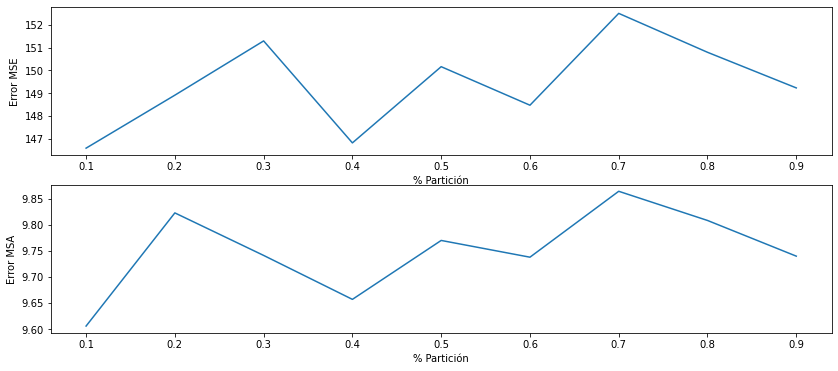

In [27]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(xe,m1)
plt.xlabel('% Partición')
plt.ylabel('Error MSE')
plt.subplot(2,1,2)
plt.plot(xe,m2)
plt.xlabel('% Partición')
plt.ylabel('Error MSA')
plt.show()

<b>Paso 13 -extra-</b> Prueba de usar un Cross Validation.

In [29]:
particion = 0.4
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=particion)
lr = LinearRegression()
modelo = lr.fit(X_train, y_train)
kf = KFold(n_splits=5)
scores = cross_val_score(lr, X_train, y_train, cv=kf)

print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

predicciones=lr.predict(X_test)

print('Costo de datos de test',lr.score(X_test, y_test))
print('R2 Score',r2_score(predicciones,y_test))
print('MSEE',msee(y_test,predicciones))
print('MAE',mae(y_test,predicciones),'\n')

Metricas cross_validation [0.89994287 0.90629054 0.90524132 0.90075824 0.89770896]
Media de cross_validation 0.9019883849198204
Costo de datos de test 0.9035985371663724
R2 Score 0.892727820052864
MSEE 100.68000911939032
MAE 8.008415823408999 



# 4.3 Linear Regression - Function (con otras librerias)

## Statsmodels

In [30]:
import statsmodels.api as sm

In [32]:
particion = 0.4
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=particion)
X_train = sm.add_constant(X_train, prepend=False)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.825e+04
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:48:31   Log-Likelihood:                -22278.
No. Observations:                6000   AIC:                         4.456e+04
Df Residuals:                    5997   BIC:                         4.458e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -9.4563      0.175    -53.972      0.0

In [48]:
X_test = sm.add_constant(X_test, prepend=False)
prediccion = modelo.predict(X_test)

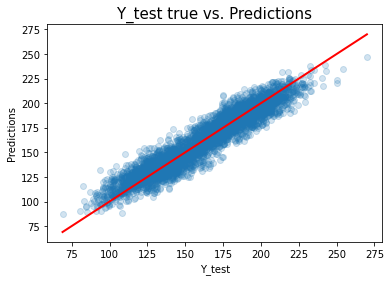

In [49]:
plt.scatter(y_test,prediccion,alpha=0.2)
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.title('Y_test true vs. Predictions', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

In [50]:
print('R2 Score',r2_score(prediccion,y_test))
print('MSEE',msee(y_test,prediccion))
print('MAE',mae(y_test,prediccion),'\n')

R2 Score 0.8898731002092496
MSEE 103.26788416857802
MAE 8.110914069574573 



## Tensorflow

Tensorflow realiza regresion lineal evaluando una función de perdida

In [85]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


Epoch 0: Loss 27181.037109375 W= [[0.10488454]
 [1.2258904 ]] b= 6.465891
Epoch 1: Loss 25132.33203125 W= [[0.06332391]
 [1.2001978 ]] b= 12.673132
Epoch 2: Loss 23244.25390625 W= [[0.0260206]
 [1.1732569]] b= 18.632069
Epoch 3: Loss 21504.212890625 W= [[-0.00739416]
 [ 1.1453102 ]] b= 24.352638
Epoch 4: Loss 19900.599609375 W= [[-0.03725863]
 [ 1.1165749 ]] b= 29.844378
Epoch 5: Loss 18422.716796875 W= [[-0.06388328]
 [ 1.087245  ]] b= 35.11644
Epoch 6: Loss 17060.703125 W= [[-0.08755277]
 [ 1.0574934 ]] b= 40.177612
Epoch 7: Loss 15805.474609375 W= [[-0.10852815]
 [ 1.0274743 ]] b= 45.036335
Epoch 8: Loss 14648.65625 W= [[-0.12704876]
 [ 0.99732375]] b= 49.700706
Epoch 9: Loss 13582.5341796875 W= [[-0.14333403]
 [ 0.9671627 ]] b= 54.1785
Epoch 10: Loss 12599.9931640625 W= [[-0.1575851 ]
 [ 0.93709755]] b= 58.477184
Epoch 11: Loss 11694.484375 W= [[-0.16998622]
 [ 0.9072216 ]] b= 62.60392
Epoch 12: Loss 10859.96484375 W= [[-0.18070628]
 [ 0.87761664]] b= 66.56559
Epoch 13: Loss 10090.

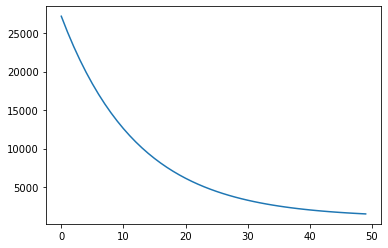

In [116]:
particion = 0.4
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=particion)
m = len(X_train) # Número de muestras
n = 2 # Caracteristicas

X = tf.placeholder(tf.float32, name='X', shape=[m,n]) # Placeholder
Y = tf.placeholder(tf.float32, name='Y')

b = tf.Variable(0.0) # Compensar
w = tf.Variable(tf.random_normal([n,1])) # Pesos, inicializados con números aleatorios

Y_hat = tf.matmul(X, w) + b # Modelo de regresión lineal (multiplicación matricial)

loss = tf.reduce_mean(tf.square(Y - Y_hat, name='loss')) + 0.6 * tf.nn.l2_loss(w) # Definir la función de pérdida

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.02).minimize(loss) # Optimizador de algoritmo de descenso de gradiente simple, tasa de aprendizaje 0.01

# Entrenamiento
init = tf.global_variables_initializer() # Inicializar variables
total = []
with tf.Session() as sess:
    sess.run(init)

    # Iterar 50 veces
    for i in range(50):
       _, l = sess.run([optimizer, loss], feed_dict={X: X_train, Y: y_train})
       total.append(l)
       print('Epoch {0}: Loss {1}'.format(i, l), "W=", sess.run(w), "b=", sess.run(b))

    b_value, w_value = sess.run([b, w]) # Calcular desplazamiento y peso

# Evaluación
N = 250
X_new = X_train [N,:]
Y_pred =  (np.matmul(X_new, w_value) + b_value).round(1)
print('Predicted value: {0}  Actual value: {1}'.format(Y_pred[0], y_train[N]) , '\nDone')

plt.plot(total)
plt.show()


In [119]:
Y_pred

array([140.3])